In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from sklearn.preprocessing import normalize
from scipy import signal
import skimage
import tifffile as tiff
import os
import math
import json
from skimage.measure import label
from skimage.measure import regionprops
from com import *
from tqdm.notebook import tqdm

# sub function and class

## some selfmake-class

# load image path and sort

This code only deal with npy

In [56]:
#指定路徑(絕對路徑) 
#path = "/home/isis0517/Documents/data/compress/HMMTest_01/"
#savepath = "/home/isis0517/Documents/data/compress/HMMTest_01_com"
#path = "/home/isis0517/Documents/data/compress/1.m2w2-10nit-1.8cm/"
savepath = "/media/isis0517/5E24DB3824DB123F/AndroidFish-main"
path = "/media/isis0517/5E24DB3824DB123F/AndroidFish-main"

#if not os.path.isdir(savepath):
#    os.mkdir(savepath)

#if not os.path.isdir(os.path.join(savepath, "pos1")):
#    os.mkdir(os.path.join(savepath, "pos1"))
#if not os.path.isdir(os.path.join(savepath, "pos2")):
#    os.mkdir(os.path.join(savepath, "pos2"))
    
flist = os.listdir(path)
tiflist = []
for filename in flist:
    if os.path.isdir(filename):
        continue
    if filename.split(".")[-1] == "npy" and filename.find("frame") >= 0:
        tiflist.append(filename)

print('There is a total of ',len(tiflist), 'images')
frame_num = len(tiflist)
#for srt in os.listdir(path):
#flist.append(srt.split('_'))

#排序路徑
tiflist.sort(key = lambda x: int(x.split("_")[-1].split(".")[0]))

#變成絕對路徑
flist = []
for filename in tiflist:
    flist.append(os.path.join(path, filename))


There is a total of  18000 images


In [55]:
print(savepath)
savepath = os.path.join("","test")
print(savepath)
savepath = os.path.join(savepath,"test")
print(savepath)

None
test
test/test


# generate background

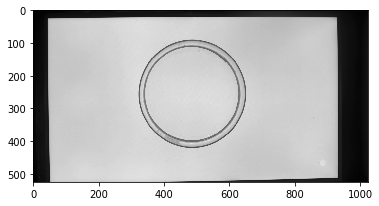

In [39]:
nbckgnd=500

tnum = np.random.randint(len(flist),size=nbckgnd)
tlist=[]
for s in tnum:
    tlist.append(flist[s])

img_shape = np.load(flist[0]).shape[0:2]
total = np.zeros(img_shape)
for file in tlist:
    b = np.load(file)
    total = total + b 
background = (total/nbckgnd).astype('uint8')
shape = img_shape
plt.imshow(background,cmap = plt.cm.gray)
plt.show()
#tiff.imwrite(os.path.join(savepath, "background.tiff"), back.cbackground)


# generate mask (no mask)

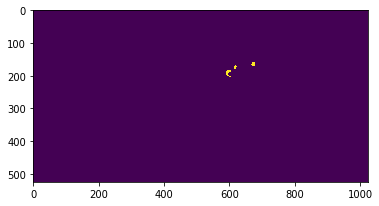

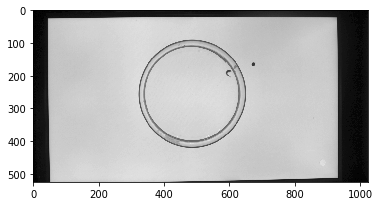

In [40]:
tnum = np.random.randint(len(flist),size=500)
tlist=[]
for s in tnum:
    tlist.append(flist[s])

img = np.load(tlist[3])
a = img
a = cv2.absdiff(a, background)

plt.imshow(a>15)
plt.show()
plt.imshow(img,cmap = plt.cm.gray)

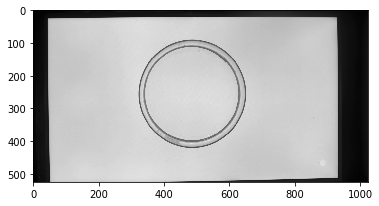

In [42]:
#test for find out the circle

mask = cv2.circle(np.zeros(background.shape).astype("uint8"), (400,300), 780, 255, -1)>200
plt.imshow(mask*background ,cmap = plt.cm.gray)

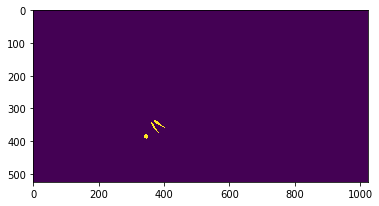

(525, 1024)


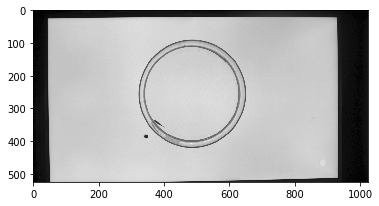

In [49]:
tnum = np.random.randint(len(flist),size=500)
tlist=[]
for s in tnum:
    tlist.append(flist[s])

img = np.load(flist[6354])
a = img
a = cv2.absdiff(a, background)

plt.imshow(a*mask>15)
plt.show()
plt.imshow(img,cmap = plt.cm.gray)
print(background.shape)

In [44]:

from multiprocessing import Process, Pool
from functools import partial

resize = (background.shape[1]//3,background.shape[0]//3)
pos1 = []
pos2 = []
video = cv2.VideoWriter(os.path.join(savepath, "16fish_30bg.avi"),cv2.VideoWriter_fourcc(*'MPEG'), 
                        30, resize, isColor=False)
#video2 = cv2.VideoWriter(os.path.join(savepath, "video2.avi"), cv2.VideoWriter_fourcc(*'ASLC'), 30, (size*2+1,size*2+1))

start = time.time()
num = 0

def npy2resize(filename, resize = resize, background = background):
    
    a = np.load(filename)
    a = cv2.absdiff(a, background)
    a = a*mask>15
    img =(255*a).astype("uint8")
    
    return cv2.resize(src=img,dsize=resize)
    

with Pool() as pool:
    result = pool.map(npy2resize, flist)
    print(len(result))
    
    for img in result:
        num += 1
        if(num%100==0):
            print(num)

        video.write(img)
    del result
        
print(time.time()-start)
video.release()
#video2.release()

#config = {"size": size, "frame_num":frame_num, "version" : "alpha",
          #"date": time.strftime("%Y-%m-%d %H:%M", time.localtime()), "shape":background.shape[0:2], "thres":thres, "is_mono":is_mono}

#with open(os.path.join(savepath, "save.config"), 'w') as jsonfile:
    #json.dump(config, jsonfile, indent=4)

print("end")

18000
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
66.63247656822205
end


In [57]:

size = (background.shape[1],background.shape[0])
pos1 = []
pos2 = []
video = cv2.VideoWriter(os.path.join(savepath, "video.avi"),cv2.VideoWriter_fourcc(*'MPEG'), 
                        30, size, isColor=False)
#video2 = cv2.VideoWriter(os.path.join(savepath, "video2.avi"), cv2.VideoWriter_fourcc(*'ASLC'), 30, (size*2+1,size*2+1))

start = time.time()
num = 0
    
for filename in flist:
    num += 1
    if(num%100==0):
        print(num)
    img = np.load(filename)
    video.write(img)
        
print(time.time()-start)
video.release()
#video2.release()

#config = {"size": size, "frame_num":frame_num, "version" : "alpha",
          #"date": time.strftime("%Y-%m-%d %H:%M", time.localtime()), "shape":background.shape[0:2], "thres":thres, "is_mono":is_mono}

#with open(os.path.join(savepath, "save.config"), 'w') as jsonfile:
    #json.dump(config, jsonfile, indent=4)

print("end")

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
135.39175486564636
end


# The version for VIDEO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
from sklearn.preprocessing import normalize
from scipy import signal
import skimage
import tifffile as tiff
import os
import math
import json
from skimage.measure import label
from skimage.measure import regionprops
from com import *

## cal the background

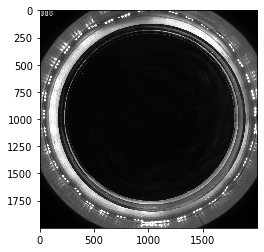

In [2]:
filepath = "/home/isis0517/Documents/data/multi/videos/bg30 18fish.avi"
video = cv2.VideoCapture(filepath)
frame_num = video.get(cv2.CAP_PROP_FRAME_COUNT)

back_num = 1000
backshape = ( int(video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))
background = np.zeros(backshape)

tnum = np.random.randint(frame_num,size=back_num)
tnum.sort()
sumv = np.array([1,1,1])

tlist = []

if not video.isOpened():
    print(f"open the video is failed with path:{filepath}")

    
for s in tnum:
    
    video.set(cv2.CAP_PROP_FRAME_COUNT, s)
    ret, frame = video.read()
    background += frame[:,:,0]

background = (background/back_num).astype('uint8')
plt.imshow(background, cmap = plt.cm.gray)
video.release()

## cal the average moveable area of fishes

10 50 82 116 398 532 632 660 767 814 823 1077 1180 1332 1346 1346 1349 1542 1726 1972 2027 2080 2348 2468 2551 2571 2761 2933 3035 3172 3195 3253 3289 3409 3471 3518 3716 3736 3865 3916 3920 3959 4040 4077 4088 4183 4247 4265 4339 4403 4429 4448 4454 4506 4590 4598 4626 4677 4722 4790 4860 4886 5009 5070 5099 5167 5289 5384 5527 5671 5747 5816 6004 6045 6153 6318 6460 6596 6794 6885 6988 7023 7064 7064 7213 7470 7568 7737 7791 7965 8010 8220 8332 8351 8402 8438 8644 8707 8812 8969 

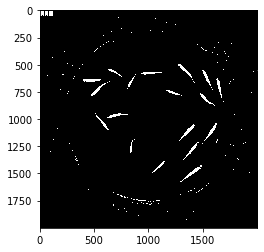

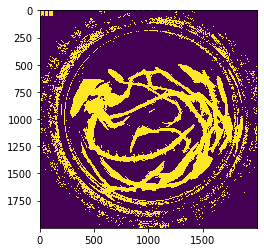

In [20]:
video = cv2.VideoCapture(filepath)
frame_num = video.get(cv2.CAP_PROP_FRAME_COUNT)

tlen = 100
move_area = np.zeros(background.shape)>10


tnum = np.random.randint(frame_num,size=tlen)
tnum.sort()

if not video.isOpened():
    print(f"open the video is failed with path:{filepath}")
    
for s in tnum:
    print(s , end=" ")
    video.set(cv2.CAP_PROP_FRAME_COUNT, 10)
    ret, frame = video.read()
    frame = frame[:,:,0]
    frame = cv2.absdiff(frame, background) > 15
    move_area = np.logical_or(move_area, frame)

plt.imshow(frame, cmap=plt.cm.gray)
plt.show()
    
plt.imshow(move_area)
video.release()

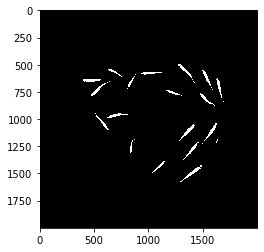

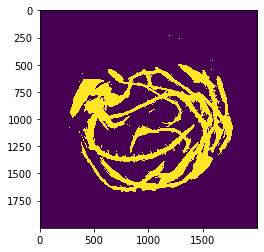

In [19]:
mask = cv2.circle(np.zeros(background.shape).astype("uint8"), (1020,970), 760, 255, -1)>200
plt.imshow(frame*mask, cmap=plt.cm.gray)
plt.show()
plt.imshow(move_area*mask)

In [6]:
video = cv2.VideoCapture(filepath)
frame_num = video.get(cv2.CAP_PROP_FRAME_COUNT)
print(frame_num)
video.release()

9000.0


## write to the video

### one process verstion

In [7]:
resize = (background.shape[1]//3,background.shape[0]//3)
pos1 = []
pos2 = []
video = cv2.VideoWriter("/home/isis0517/Documents/data/multi/videos/17fish.avi",cv2.VideoWriter_fourcc(*'MPEG'), 30, resize, isColor=False)
srcvideo = cv2.VideoCapture(filepath)
#video2 = cv2.VideoWriter(os.path.join(savepath, "video2.avi"), cv2.VideoWriter_fourcc(*'ASLC'), 30, (size*2+1,size*2+1))

start = time.time()
num = 0

def frame2resize(frame, resize = resize, background = background):
    
    a = np.average(frame, axis=2).astype('uint8')
    a = cv2.absdiff(a, background)
    a = a*mask
    img = (255*a).astype("uint8")
    img = cv2.resize(src=a,dsize=resize)
    
    return img

s=0
while srcvideo.isOpened():
    #load next frame
    ret, frame = srcvideo.read()
        
    img = frame2resize(frame)
        
    video.write(img)
    
    if s%1000 == 0:
        print(f"{s} : {time.time()-start}")
    
    s+=1

print(time.time()-start)
video.release()
srcvideo.release()
#video2.release()

#config = {"size": size, "frame_num":frame_num, "version" : "alpha",
          #"date": time.strftime("%Y-%m-%d %H:%M", time.localtime()), "shape":background.shape[0:2], "thres":thres, "is_mono":is_mono}

#with open(os.path.join(savepath, "save.config"), 'w') as jsonfile:
    #json.dump(config, jsonfile, indent=4)

print("end")

0 : 0.11939215660095215
1000 : 108.26127004623413
2000 : 216.27660083770752
3000 : 323.96302604675293
4000 : 431.62320470809937
5000 : 536.9769670963287
6000 : 642.5821399688721
7000 : 748.2044901847839
8000 : 853.8010821342468


IndexError: tuple index out of range

### multi versiom

In [21]:
from multiprocessing import Process, Pool
from functools import partial

resize = (background.shape[1]//3,background.shape[0]//3)
pos1 = []
pos2 = []
video = cv2.VideoWriter("/home/isis0517/Documents/data/multi/videos/17fish.avi",cv2.VideoWriter_fourcc(*'MPEG'), 30, resize, isColor=False)
srcvideo = cv2.VideoCapture(filepath)
#video2 = cv2.VideoWriter(os.path.join(savepath, "video2.avi"), cv2.VideoWriter_fourcc(*'ASLC'), 30, (size*2+1,size*2+1))

start = time.time()
num = 0

def frame2resize(frame, resize = resize, background = background):
    
    a = cv2.absdiff(frame, background)
    a = a*mask>20
    img = (255*a).astype("uint8")
    img = cv2.resize(src=img,dsize=resize)
    
    return img

# cal how many frame can be stored in 5G ram 

if not srcvideo.isOpened():
    print("GG, no video is opened")
ret, frame = srcvideo.read()
src_frame_n = srcvideo.get(cv2.CAP_PROP_FRAME_COUNT)
len_lim = (5*1000*1000*1000)//(frame.nbytes//3)
sumv = np.array([1,1,1])

srcvideo.set(cv2.CAP_PROP_POS_FRAMES, 0)

print(f"limti:{len_lim}")

with Pool() as pool:
        
    while srcvideo.isOpened():
        
        imgs = []
        for s in range(len_lim):
            ret, frame = srcvideo.read()
            if not ret:
                break
            #frame = np.mean(frame, axis=2, dtype='uint8')
            imgs.append(frame[:,:,0])
        
        if len(imgs) == 0:
            break
        
        
        result = pool.map(frame2resize, imgs, chunksize=50)
        
        del imgs
        
        for img in result:
            video.write(img)
        
        print(f"current position : {srcvideo.get(cv2.CAP_PROP_POS_FRAMES)} | time = {time.time()-start:.4f}")
        del result
        
video.release()
srcvideo.release()
del imgs        
print(time.time()-start)

#video2.release()

#config = {"size": size, "frame_num":frame_num, "version" : "alpha",
          #"date": time.strftime("%Y-%m-%d %H:%M", time.localtime()), "shape":background.shape[0:2], "thres":thres, "is_mono":is_mono}

#with open(os.path.join(savepath, "save.config"), 'w') as jsonfile:
    #json.dump(config, jsonfile, indent=4)

print("end")

limti:1250
current position : 1250.0 | time = 42.9801
current position : 2500.0 | time = 86.1778
current position : 3750.0 | time = 128.7281
current position : 5000.0 | time = 171.0739
current position : 6250.0 | time = 213.5797
current position : 7500.0 | time = 256.5096
current position : 8750.0 | time = 298.7380
current position : 9000.0 | time = 307.8425
307.9096043109894
end


In [14]:
from multiprocessing import Process, Pool
from functools import partial

resize = (background.shape[1]//3,background.shape[0]//3)
pos1 = []
pos2 = []
video = cv2.VideoWriter("/home/isis0517/Documents/data/multi/videos/18fish.avi",cv2.VideoWriter_fourcc(*'MPEG'), 30, resize, isColor=False)
srcvideo = cv2.VideoCapture(filepath)
#video2 = cv2.VideoWriter(os.path.join(savepath, "video2.avi"), cv2.VideoWriter_fourcc(*'ASLC'), 30, (size*2+1,size*2+1))

start = time.time()
num = 0

def frame2resize(frame, resize = resize, background = background):
    
    a = cv2.absdiff(frame, background)
    a = a*mask>20
    img = (255*a).astype("uint8")
    img = cv2.resize(src=img,dsize=resize)
    
    return img

# cal how many frame can be stored in 8G ram 

if not srcvideo.isOpened():
    print("GG, no video is opened")
ret, frame = srcvideo.read()
src_frame_n = srcvideo.get(cv2.CAP_PROP_FRAME_COUNT)
len_lim = (5*1000*1000*1000)//(frame.nbytes//3)

srcvideo.set(cv2.CAP_PROP_POS_FRAMES, 0)

print(f"limti:{len_lim}")

with Pool() as pool:
        
    while srcvideo.isOpened():
        
        results = []
        for s in range(len_lim):
            ret, frame = srcvideo.read()
            if not ret:
                break
            frame = np.mean(frame, axis=2, dtype='uint8')
            results.append(pool.apply_async(np.mean(frame, axis=2, dtype='uint8'))
        
        if len(imgs) == 0:
            break
        
        result = pool.map(frame2resize, imgs)
        
        del imgs
        
        for img in result:
            video.write(img)
        
        print(f"current position : {srcvideo.get(cv2.CAP_PROP_POS_FRAMES)} | time = {time.time()-start:.4f}")
        del result
        
video.release()
srcvideo.release()
del imgs        
print(time.time()-start)

#video2.release()

#config = {"size": size, "frame_num":frame_num, "version" : "alpha",
          #"date": time.strftime("%Y-%m-%d %H:%M", time.localtime()), "shape":background.shape[0:2], "thres":thres, "is_mono":is_mono}

#with open(os.path.join(savepath, "save.config"), 'w') as jsonfile:
    #json.dump(config, jsonfile, indent=4)

print("end")

In [16]:
test = np.random.randint(10,size=(10,10,3), dtype='uint8')
print(np.dot(test, np.array([1,1,1], dtype='uint8'))[5,5], test[5,5] )
print(np.dot(test, np.array([1,1,1], dtype='uint8'))[5,5].dtype)

13 [5 4 4]
uint8


In [14]:
x = np.array([[10,10],[1,1]]).T
A = np.array(range(4)).reshape(2,2)

In [8]:
A

array([[0, 1],
       [2, 3]])

In [9]:
x

array([10, 10])

In [10]:
print(np.dot(A,x))

[10 50]


In [15]:
print(np.dot(A,x))

[[10  1]
 [50  5]]


In [23]:
labels = np.array([[10,10],[100,10],[10,100],[100,100]])
X = np.array([labels[0]-labels[3],
              labels[1]-labels[2]]).T
print(X)
cM = np.random.randint(-100,100, size=(2,2))/100
print(cM)



[[-90  90]
 [-90 -90]]
[[-0.61 -0.16]
 [-0.45 -0.23]]


In [37]:
print(np.dot(cM, labels[0]),np.dot(cM, labels[3]),np.dot(cM, labels[0])-np.dot(cM, labels[3]))
print(np.dot(cM,X))
mapping = np.dot(cM,labels.T).T

C = np.array([mapping[0]-mapping[3],
              mapping[1]-mapping[2]]).T
print(C)

[-7.7 -6.8] [-77. -68.] [69.3 61.2]
[[ 69.3 -40.5]
 [ 61.2 -19.8]]
[[ 69.3 -40.5]
 [ 61.2 -19.8]]


In [31]:
print(np.dot(C,np.linalg.inv(X)))

[[-0.61 -0.16]
 [-0.45 -0.23]]


# The version for tiffs

In [11]:
#指定路徑(絕對路徑) 
#path = "/home/isis0517/Documents/data/compress/HMMTest_01/"
#savepath = "/home/isis0517/Documents/data/compress/HMMTest_01_com"
#path = "/home/isis0517/Documents/data/compress/1.m2w2-10nit-1.8cm/"
savepath = "/home/isis0517/Documents/data/20200111/01"
path = "/media/isis0517/5E24DB3824DB123F/0111/01"

if not os.path.isdir(savepath):
    os.makedirs(savepath)

if not os.path.isdir(os.path.join(savepath, "pos1")):
    os.mkdir(os.path.join(savepath, "pos1"))
if not os.path.isdir(os.path.join(savepath, "pos2")):
    os.mkdir(os.path.join(savepath, "pos2"))
    
flist = os.listdir(path)
tiflist = []
for filename in flist:
    if os.path.isdir(filename):
        continue
    if filename.split(".")[-1] == "tiff":
        tiflist.append(filename)

print('There is a total of ',len(tiflist), 'images')
frame_num = len(tiflist)
#for srt in os.listdir(path):
#flist.append(srt.split('_'))

#排序路徑
tiflist.sort(key = lambda x: int(x.split("_")[-1].split(".")[0]))

#變成絕對路徑
flist = []
for filename in tiflist:
    flist.append(os.path.join(path, filename))
  

There is a total of  22505 images


In [60]:
print(flist[0])

/media/isis0517/5E24DB3824DB123F/0111/01/Basler_acA4096-40um__40058359__20210111_173005588_1.tiff


In [12]:
img =tiff.TiffFile(flist[0]).asarray()
size = (img.shape[1], img.shape[0])
video = cv2.VideoWriter(os.path.join(savepath, "video.avi"), cv2.VideoWriter_fourcc(*'MPEG'),
                        40, size, isColor=False)

start = time.time()
num = 0

for filename in flist[0:19600]:
    num += 1
    if (num % 100 == 0):
        print(num)
    img = tiff.TiffFile(filename).asarray()
    video.write(img)

print(time.time() - start)
video.release()

print("end")

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

In [4]:
a = np.ones((22505, 2, 2)) * np.NaN

In [5]:
print(a[10])

[[nan nan]
 [nan nan]]


In [6]:
a.shape

(22505, 2, 2)

In [8]:
a[454545,1,1]

IndexError: index 454545 is out of bounds for axis 0 with size 22505

In [4]:
import csv

# 開啟 CSV 檔案
with open('/home/isis0517/20210111.csv', newline='') as csvfile:

  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile, delimiter=';')

  # 以迴圈輸出每一列
  for s,row in enumerate(rows):
    print(row)
    if s > 10 :
        break
        

['frame', 'video > 1 > path > position >  x', 'video > 1 > path > position >  y', 'video > 1 > crossings', 'video > 2 > path > position >  x', 'video > 2 > path > position >  y', 'video > 2 > crossings', '']
['0', '439', '960', '0', '251', '754', '0', '']
['1', '446', '959', '0', '241', '760', '0', '']
['2', '454', '956', '0', '233', '765', '0', '']
['3', '461', '951', '0', '225', '771', '0', '']
['4', '467', '944', '0', '216', '777', '0', '']
['5', '473', '937', '0', '211', '782', '0', '']
['6', '477', '930', '0', '204', '786', '0', '']
['7', '480', '924', '0', '199', '790', '0', '']
['8', '484', '918', '0', '194', '794', '0', '']
['9', '486', '912', '0', '191', '796', '0', '']
['10', '488', '906', '0', '190', '798', '0', '']


In [50]:

traj = []
cross = []
with open('/home/isis0517/Documents/data/20210111/20210111.csv', newline='') as csvfile:

  # 讀取 CSV 檔案內容
  rows = csv.reader(csvfile, delimiter=';')

  # 以迴圈輸出每一列
  for s,row in enumerate(rows):
    if s > 0 :
        traj.append((int(row[1]), int(row[2])))
        cross.append(row[3]=='1')
    if s == 7083:
        break

In [51]:
print(traj[0:100], cross[-10:])

[(439, 960), (446, 959), (454, 956), (461, 951), (467, 944), (473, 937), (477, 930), (480, 924), (484, 918), (486, 912), (488, 906), (491, 902), (492, 897), (494, 893), (495, 889), (496, 885), (497, 881), (498, 878), (499, 874), (500, 871), (500, 867), (499, 860), (497, 854), (494, 847), (490, 841), (486, 836), (482, 832), (478, 828), (474, 825), (471, 822), (467, 819), (464, 817), (461, 815), (458, 813), (455, 811), (452, 809), (449, 808), (446, 806), (444, 805), (441, 804), (439, 802), (436, 801), (434, 800), (432, 799), (429, 797), (427, 796), (425, 796), (423, 794), (421, 793), (418, 792), (413, 789), (406, 786), (398, 781), (392, 777), (385, 772), (379, 769), (374, 765), (369, 761), (364, 758), (360, 754), (356, 752), (352, 749), (348, 746), (345, 744), (341, 741), (338, 739), (335, 737), (331, 734), (328, 732), (325, 730), (322, 728), (319, 726), (317, 724), (314, 723), (312, 720), (308, 717), (305, 712), (301, 705), (298, 696), (296, 688), (293, 680), (291, 674), (290, 667), (28

GG


In [3]:
path = "/media/isis0517/QVO2/0115/03/"
savepath = "/media/isis0517/QVO2/0115/"

flist = os.listdir(path)
tiflist = []
for filename in flist:
    if os.path.isdir(filename):
        continue
    if filename.split(".")[-1] == "npy" :
        tiflist.append(filename)

print('There is a total of ',len(tiflist), 'images')
frame_num = len(tiflist)
#for srt in os.listdir(path):
#flist.append(srt.split('_'))

#排序路徑
tiflist.sort(key = lambda x: int(x.split("_")[-1].split(".")[0]))

#變成絕對路徑
flist = []
for filename in tiflist:
    flist.append(os.path.join(path, filename))

There is a total of  23430 images


In [4]:
background = np.load(flist[0])
size = (background.shape[1],background.shape[0])
pos1 = []
pos2 = []
video = cv2.VideoWriter(os.path.join(savepath, "video03.avi"),cv2.VideoWriter_fourcc(*'MPEG'), 
                        30, size, isColor=True)
#video2 = cv2.VideoWriter(os.path.join(savepath, "video2.avi"), cv2.VideoWriter_fourcc(*'ASLC'), 30, (size*2+1,size*2+1))

start = time.time()
num = 0
    
for filename in tqdm(flist):
    img = np.load(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BayerBG2RGB)
    video.write(img)
        
print(time.time()-start)
video.release()

print("end")

ValueError: cannot reshape array of size 4165504 into shape (2046,2040)